In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
ladies = pd.read_csv('lyrics_and_artist.csv',encoding='latin-1')
ladies.head()

# encoding because of special characters

,lyrics,artist
0,"I've been drinkin', I've been drinkin'",beyonce
1,I get filthy when that liquor get into me,beyonce
2,"I've been thinkin', I've been thinkin'",beyonce
3,Why can't I keep my fingers off it?,beyonce
4,"Baby, I want you, now-now",beyonce


In [3]:
ladies = ladies[['artist','lyrics']]
ladies.head()

,artist,lyrics
0,beyonce,"I've been drinkin', I've been drinkin'"
1,beyonce,I get filthy when that liquor get into me
2,beyonce,"I've been thinkin', I've been thinkin'"
3,beyonce,Why can't I keep my fingers off it?
4,beyonce,"Baby, I want you, now-now"


In [4]:
ladies['lyrics'].replace({'<|endoftext|>': None}, inplace=True)
ladies.isnull().sum()

artist      0
lyrics    148
dtype: int64

In [5]:
ladies.dropna(inplace=True)

In [6]:
ladies.shape

(9488, 2)

In [7]:
ladies['artist'].value_counts()

beyonce    4937
rihanna    4551
Name: artist, dtype: int64

## Feature Engineering

In [8]:
ladies['line_length'] = ladies['lyrics'].map(len)
ladies['word_count'] = ladies['lyrics'].map(lambda each: len(each.split()))
ladies['unique_words_count'] = ladies['lyrics'].apply(lambda each: len(set(each.split())))
ladies['lexical_richness'] = ladies['unique_words_count'] / ladies['word_count']
ladies.head()

,artist,lyrics,line_length,word_count,unique_words_count,lexical_richness
0,beyonce,"I've been drinkin', I've been drinkin'",38,6,4,0.666667
1,beyonce,I get filthy when that liquor get into me,41,9,8,0.888889
2,beyonce,"I've been thinkin', I've been thinkin'",38,6,4,0.666667
3,beyonce,Why can't I keep my fingers off it?,35,8,8,1.000000
4,beyonce,"Baby, I want you, now-now",25,5,5,1.000000


## Dataframe EDA

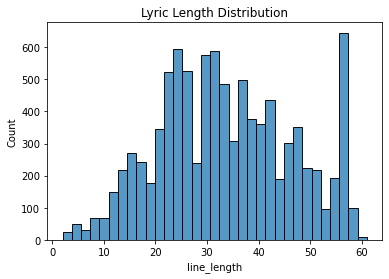

In [9]:
sns.histplot(ladies['line_length'], kde=False)
plt.title('Lyric Length Distribution');

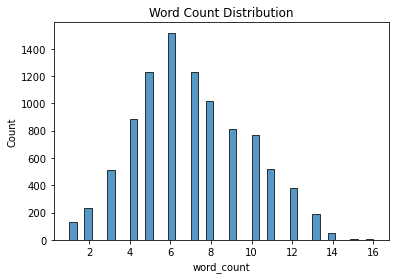

In [10]:
sns.histplot(ladies['word_count'], kde=False)
plt.title('Word Count Distribution');

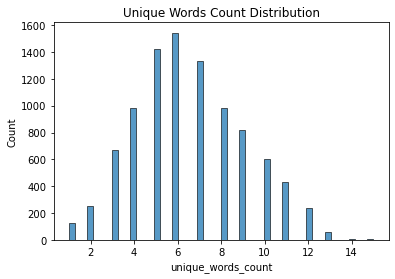

In [11]:
sns.histplot(ladies['unique_words_count'], kde=False)
plt.title('Unique Words Count Distribution');

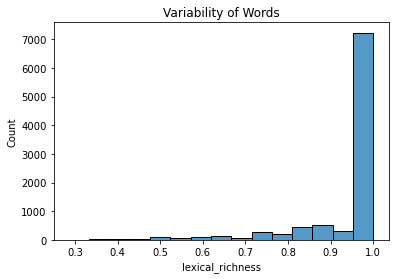

In [12]:
sns.histplot(ladies['lexical_richness'], kde=False)
plt.title('Variability of Words');

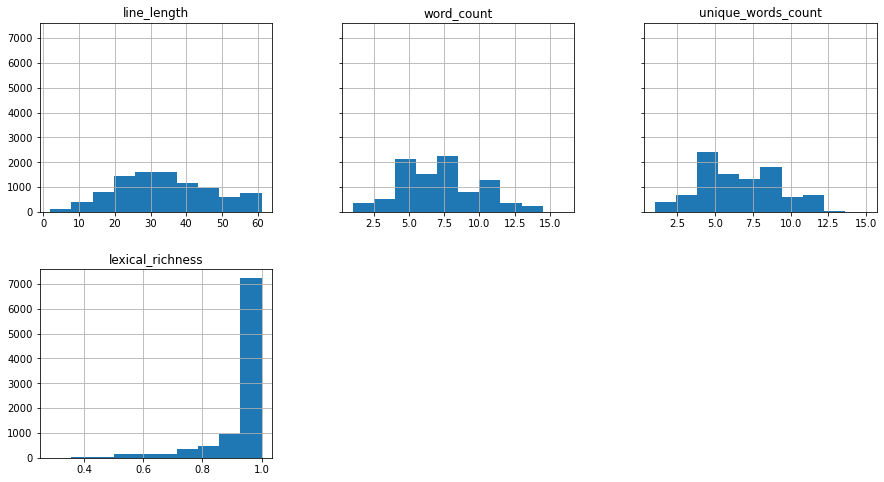

In [13]:
ladies.hist(sharey=True, layout=(2,3), figsize=(15,8))
plt.title('Distribution for all Text Analyses');

In [14]:
# pd.Series(len(each) for each in ''.join(ladies.lyrics).split()).value_counts().sort_index().plot(kind='bar', figsize=(12,3))
# plt.title('');

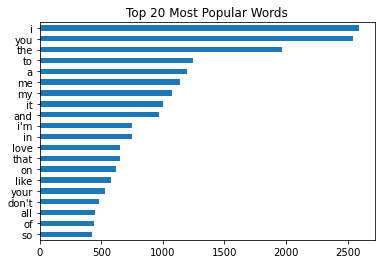

In [15]:
pd.Series(' '.join(ladies.lyrics).lower().split()).value_counts()[:20][::-1].plot(kind='barh')
plt.title('Top 20 Most Popular Words');

In [16]:
from nltk import ngrams

In [17]:
def get_ngrams_from_series(series, n=2):
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/keturananny/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


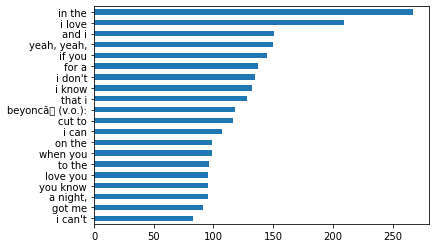

In [18]:
pd.Series(get_ngrams_from_series(ladies.lyrics,2)).value_counts()[:20][::-1].plot(kind='barh');

# top 20 most frequent sequence of 2 words

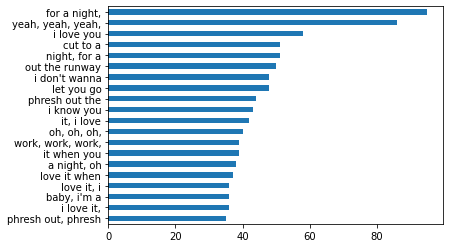

In [19]:
pd.Series(get_ngrams_from_series(ladies.lyrics,3)).value_counts()[:20][::-1].plot(kind='barh');

# top 20 most frequent sequence of 3 words

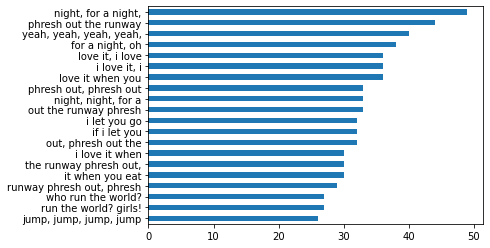

In [20]:
pd.Series(get_ngrams_from_series(ladies.lyrics,4)).value_counts()[:20][::-1].plot(kind='barh');

# top 20 most frequent sequence of 4 words

In [21]:
# scatter text for entire dataframe

## EDA for Beyonce vs. Rihanna

In [22]:
# ladies[ladies['artist'] =='beyonce'].sort_values(by='word_count', ascending=True)[['lyrics']].head()
# ladies[ladies['artist'] =='rihanna'].sort_values(by='word_count', ascending=True)[['lyrics']].head()

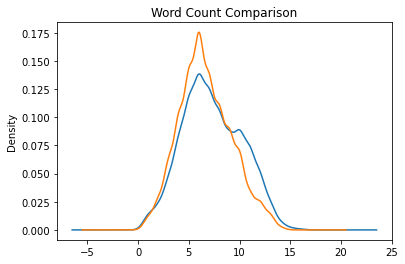

In [23]:
ladies.groupby('artist').word_count.plot(kind='kde')
plt.title('Word Count Comparison');

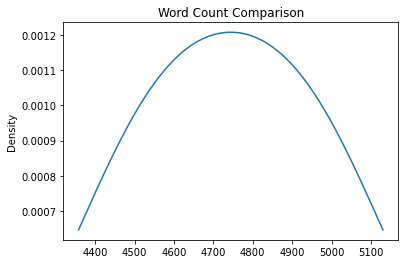

In [24]:
ladies.groupby('artist').count().word_count.plot(kind='kde')
plt.title('Word Count Comparison');

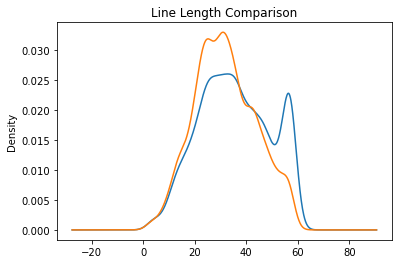

In [25]:
ladies.groupby('artist').line_length.plot(kind='kde')
plt.title('Line Length Comparison');

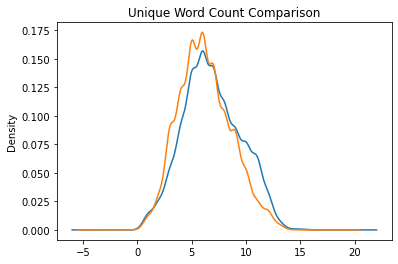

In [26]:
ladies.groupby('artist').unique_words_count.plot(kind='kde')
plt.title('Unique Word Count Comparison');

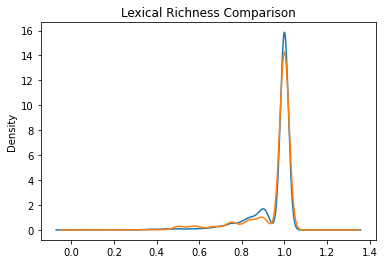

In [27]:
ladies.groupby('artist').lexical_richness.plot(kind='kde')
plt.title('Lexical Richness Comparison');

In [ ]:
# the distribution of the top 10 most popular lyrics in Beyonce's lyrics
#sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='line_length')[['line_length']])
#plt.title('Character Count for Beyonce');

In [ ]:
#sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='line_length')[['line_length']])
#plt.title('Character Count for Rihanna');

In [ ]:
#sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='word_count')[['word_count']])
#plt.title('Word Count for Beyonce Songs');

In [ ]:
# sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='word_count')[['word_count']])
# plt.title('Word Count for Rihanna Songs');

In [ ]:
#sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='word_count')[['word_count']])
#plt.title('Word Count for Beyonce Lyrics');

In [ ]:
#sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='line_word_count')[['line_word_count']])
#plt.title('Word Count for Rihanna Lyrics');

In [ ]:
# sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='unique_words_count')[['unique_words_count']])
# plt.title('Unique Words Count for Beyonce Lyrics');

In [ ]:
#sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='unique_words_count')[['unique_words_count']], label='rihanna')
# plt.title('Unique Words Count for Rihanna Lyrics');

In [ ]:
# sns.histplot(ladies[ladies['artist'] == 'beyonce'].sort_values(by ='lexical_richness')[['lexical_richness']])
# plt.title('Variability of Beyonce Lyrics');

In [ ]:
#sns.histplot(ladies[ladies['artist'] == 'rihanna'].sort_values(by ='lexical_richness')[['lexical_richness']])
#plt.title('Variability of Rihanna Lyrics');